<a href="https://colab.research.google.com/github/Priya-gawhane/CODSOFT/blob/main/Sign_language_recognisition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing the dependencies

In [ ]:
import string
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

Data collection and preprocessing

In [ ]:
df = pd.read_csv('/content/TrainData.csv')
df.head()


,pixel_0,pixel_1,pixel_2,pixel_3,pixel_4,pixel_5,pixel_6,pixel_7,pixel_8,pixel_9,...,pixel_775,pixel_776,pixel_777,pixel_778,pixel_779,pixel_780,pixel_781,pixel_782,pixel_783,label
0,255,255,255,255,255,255,255,255,255,255,...,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,0.0
1,255,255,255,255,255,255,255,255,255,255,...,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,0.0
2,255,255,255,255,255,255,255,255,255,255,...,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,0.0
3,255,255,255,255,255,255,255,255,255,255,...,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,0.0
4,255,255,255,255,255,255,255,255,255,255,...,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,0.0


In [ ]:
def load_data(path):
	df = pd.read_csv(path)
	y = np.array([label if label < 9
				else label-1 for label in df['label']])
	df = df.drop('label', axis=1)
	x = np.array([df.iloc[i].to_numpy().reshape((28, 28))
				for i in range(len(df))]).astype(float)
	x = np.expand_dims(x, axis=3)
	y = pd.get_dummies(y).values

	return x, y

X_train, Y_train = load_data('/content/TrainData.csv')
X_test, Y_test = load_data('/content/TestData.csv')


In [ ]:
print(X_train.shape, Y_train.shape)
print(X_test.shape, Y_test.shape)


(7232, 28, 28, 1) (7232, 15)
(4267, 28, 28, 1) (4267, 26)


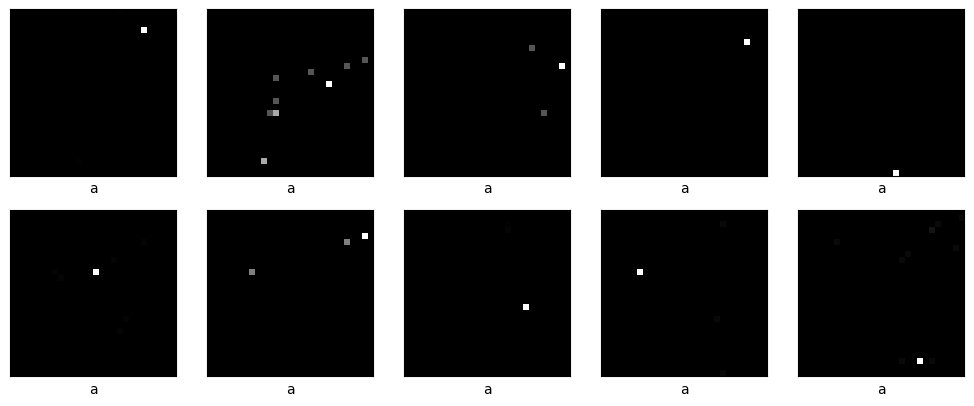

In [ ]:
class_names = list(string.ascii_lowercase[:26].replace(
	'j', '').replace('z', ''))

plt.figure(figsize=(10, 10))
for i in range(10):
	plt.subplot(5, 5, i+1)
	plt.xticks([])
	plt.yticks([])
	plt.grid(False)
	plt.imshow(X_train[i].squeeze(), cmap=plt.cm.binary)
	plt.xlabel(class_names[np.argmax(Y_train, axis=1)[i]])
plt.tight_layout()
plt.show()


In [ ]:
model = tf.keras.models.Sequential([
	tf.keras.layers.Conv2D(filters=32,
						kernel_size=(3, 3),
						activation='relu',
						input_shape=(28, 28, 1)),
	tf.keras.layers.MaxPooling2D(2, 2),

	tf.keras.layers.Conv2D(filters=64,
						kernel_size=(3, 3),
						activation='relu'),
	tf.keras.layers.MaxPooling2D(2, 2),

	tf.keras.layers.Flatten(),
	tf.keras.layers.BatchNormalization(),
	tf.keras.layers.Dense(256, activation='relu'),
	tf.keras.layers.Dropout(0.3),
	tf.keras.layers.BatchNormalization(),
	tf.keras.layers.Dense(24, activation='softmax')
])


In [ ]:
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 batch_normalization (Batch  (None, 1600)              6

In [ ]:
model.compile(
	optimizer='adam',
	loss='categorical_crossentropy',
	metrics=['accuracy']
)


In [ ]:
!pip install tensorflow
!pip install keras

In [ ]:
import tensorflow as tf
from tensorflow import keras

In [ ]:
print("train_generator" in globals())
print("val_generator" in globals())

False
False


In [ ]:
history = model.fit(train_generator,
					validation_data=val_generator,
					epochs=5,
					verbose=1)

NameError: name 'train_generator' is not defined

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
train_generator = ImageDataGenerator().flow_from_directory(
    '/path/to/train_data',
    target_size=(150, 150),
    batch_size=20
)

FileNotFoundError: [Errno 2] No such file or directory: '/path/to/train_data'

In [ ]:
history = model.fit(train_generator,
					validation_data=val_generator,
					epochs=5,
					verbose=1)

NameError: name 'train_generator' is not defined